In [ ]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

'\n================================================================================\nDEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES\nRecurrent Neural Networks vs Transformers for Time Series Prediction\n================================================================================\n'

In [ ]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: 2025AB05146
Name: P.Krishna Charan
Email: 2025AB05146@wilp.bits-pilani.ac.in
Date: 8/2/2026
================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: 2025AB05146\nName: P.Krishna Charan\nEmail: 2025ab05146@wilp.bits-pilani.ac.in\nDate: 8/2/2026\n================================================================================\n'

In [ ]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT:
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

'\n================================================================================\nASSIGNMENT OVERVIEW\n================================================================================\n\nThis assignment requires you to implement and compare two approaches for\ntime series forecasting:\n1. LSTM or GRU using Keras/PyTorch\n2. Transformer encoder using Keras/PyTorch layers\n\nLearning Objectives:\n- Build recurrent neural networks for sequential data\n- Use transformer architecture for time series\n- Implement or integrate positional encoding\n- Compare RNN vs Transformer architectures\n- Understand time series preprocessing and evaluation\n\nIMPORTANT:\n- Positional encoding MUST be added to transformer\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Use temporal train/test split (NO shuffling)\n\n================================================================================\n'

In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import json
import os
import math
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam


Deep learning frameworks (choose Keras or PyTorch)

In [ ]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

'\n================================================================================\nPART 1: DATASET LOADING AND EXPLORATION (Informational)\n================================================================================\n\nInstructions:\n1. Choose ONE dataset from the allowed list\n2. Load and explore the time series data\n3. Fill in ALL required metadata fields below\n4. Provide justification for your primary metric choice\n\nALLOWED DATASETS:\n- Stock Prices (daily/hourly closing prices)\n- Weather Data (temperature, humidity, pressure)\n- Energy Consumption (electricity/power usage)\n- Sensor Data (IoT sensor readings)\n- Custom time series (with approval)\n\nREQUIRED OUTPUT:\n- Print all metadata fields\n- Time series plots\n- Stationarity analysis\n- Train/test split visualization\n================================================================================\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = r"/content/drive/MyDrive/Metro_Interstate_Traffic_Volume.csv"
data = pd.read_csv(dataset, sep=',', decimal='.')
display(data.head())

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


1.1 Dataset Selection and Loading


In [ ]:
dataset_name = "Metro Interstate Traffic Volume"
dataset_source = "https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume"
n_samples = 48204
n_features = 1
sequence_length = 24
prediction_horizon = 1
problem_type = "time_series_forecasting"


In [ ]:
# Primary metric selection
primary_metric = "MAE"
metric_justification = """
MAE was chosen as the primary metric because it provides a clear and interpretable measure of average prediction error in the original scale. Unlike MAPE, it is not inflated by near-zero traffic values, and it is less sensitive to large outliers than RMSE.
"""


In [ ]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: Metro Interstate Traffic Volume
Source: https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume
Total Samples: 48204
Number of Features: 1
Sequence Length: 24
Prediction Horizon: 1
Primary Metric: MAE
Metric Justification: 
MAE was chosen as the primary metric because it provides a clear and interpretable measure of average prediction error in the original scale. Unlike MAPE, it is not inflated by near-zero traffic values, and it is less sensitive to large outliers than RMSE.



1.2 Time Series Exploration



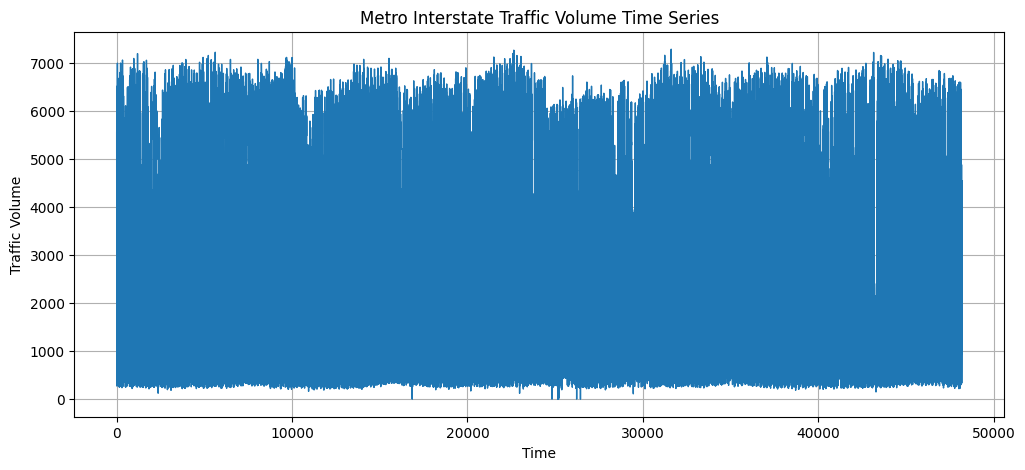

In [ ]:
series = data["traffic_volume"].values.reshape(-1, 1)


plt.figure(figsize=(12, 5))
plt.plot(series, linewidth=1)
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.title("Metro Interstate Traffic Volume Time Series")
plt.grid(True)
plt.show()


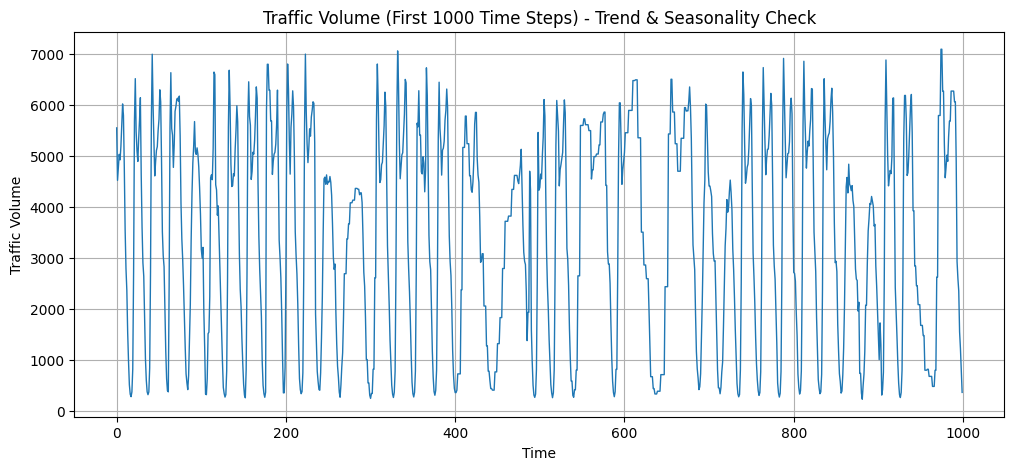

In [ ]:
# Visual inspection for trend and seasonality
plt.figure(figsize=(12, 5))
plt.plot(series[:1000], linewidth=1)
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume (First 1000 Time Steps) - Trend & Seasonality Check")
plt.grid(True)
plt.show()


1.3 Data Preprocessing

In [ ]:
data["date_time"] = pd.to_datetime(data["date_time"])
data = data.sort_values("date_time")

series = data["traffic_volume"].values.reshape(-1, 1)

print("Total timesteps:", len(series))


Total timesteps: 48204


In [ ]:
split_idx = int(len(series) * 0.9)

train_data = series[:split_idx]
test_data = series[split_idx:]

print("Train size:", train_data.shape)
print("Test size:", test_data.shape)


Train size: (43383, 1)
Test size: (4821, 1)


In [ ]:
def preprocess_timeseries(data):
    """
    Preprocess time series data

    Args:
        data: raw time series data (numeric, univariate)

    Returns:
        preprocessed data, scaler
    """
    data = np.asarray(data, dtype=float).reshape(-1, 1)

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled, scaler


In [ ]:
train_scaled, scaler = preprocess_timeseries(train_data)
test_scaled = scaler.transform(test_data)


In [ ]:
def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction

    Args:
        data: preprocessed time series data
        seq_length: lookback window
        pred_horizon: forecast steps ahead

    Returns:
        X: input sequences, y: target values
    """
    X, y = [], []

    for i in range(len(data) - seq_length - pred_horizon + 1):
        # Input window: [t-n, ..., t]
        X.append(data[i : i + seq_length])

        # Target: [t+1] or [t+1, ..., t+h]
        y.append(data[i + seq_length : i + seq_length + pred_horizon])

    return np.array(X), np.array(y)


Data Preprocessing and creation of sequences

In [ ]:
sequence_length = 24
prediction_horizon = 1
n_features = 1

X_train, y_train = create_sequences(train_scaled, sequence_length, prediction_horizon)
X_test, y_test = create_sequences(test_scaled, sequence_length, prediction_horizon)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(43359, 24, 1) (43359, 1, 1)
(4797, 24, 1) (4797, 1, 1)


In [ ]:
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test  = X_test.astype(np.float32)
y_test  = y_test.astype(np.float32)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)


(43359, 24, 1) (43359, 1)
float32 float32


In [ ]:
train_test_ratio = 0.9
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]

In [ ]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 0.9
Training Samples: 43359
Test Samples: 4797
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [ ]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build LSTM OR GRU using Keras/PyTorch layers\n- Architecture must include:\n  * At least 2 stacked recurrent layers\n  * Output layer for prediction\n- Use model.compile() and model.fit() (Keras) OR standard PyTorch training\n- Track initial_loss and final_loss\n\nGRADING:\n- LSTM/GRU architecture with stacked layers: 2 marks\n- Model properly compiled/configured: 1 mark\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

2.1 LSTM/GRU Architecture Design

In [ ]:
def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM or GRU model
    """
    model = Sequential()

    if model_type == "LSTM":
        model.add(LSTM(hidden_units, return_sequences=True, input_shape=input_shape))
    elif model_type == "GRU":
        model.add(GRU(hidden_units, return_sequences=True, input_shape=input_shape))
    else:
        raise ValueError("model_type must be 'LSTM' or 'GRU'")

    for _ in range(n_layers - 2):
        if model_type == "LSTM":
            model.add(LSTM(hidden_units, return_sequences=True))
        else:
            model.add(GRU(hidden_units, return_sequences=True))

    if model_type == "LSTM":
        model.add(LSTM(hidden_units))
    else:
        model.add(GRU(hidden_units))

    model.add(Dense(output_size))

    return model


 Create RNN model


In [ ]:
rnn_model = build_rnn_model(
    model_type="LSTM",
    input_shape=(sequence_length, n_features),
    hidden_units=64,
    n_layers=2,
    output_size=prediction_horizon
)

rnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

Compile model


In [ ]:
rnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
    loss="mse",
    metrics=["mae"]
)


2.2 Train RNN Model

In [ ]:
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [ ]:
# Track training time
rnn_start_time = time.time()

 Train model

In [ ]:
history = rnn_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=64,
    verbose=1
)


Epoch 1/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.2889 - mae: 0.3784
Epoch 2/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0855 - mae: 0.1951
Epoch 3/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0789 - mae: 0.1826
Epoch 4/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0727 - mae: 0.1745
Epoch 5/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0705 - mae: 0.1723
Epoch 6/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0708 - mae: 0.1701
Epoch 7/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0670 - mae: 0.1656
Epoch 8/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0659 - mae: 0.1628
Epoch 9/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0656 - mae: 0.1623
Epoch 10/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0639 - mae: 0.1606
Epoch 11/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0632 - mae: 0.1588
Epoch 12/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0636 - mae: 0.1581
Epoch 13/20
678/678 ━━━━━

In [ ]:
rnn_training_time = time.time() - rnn_start_time

In [ ]:
rnn_initial_loss = history.history['loss'][0]
rnn_final_loss = history.history['loss'][-1]


In [ ]:
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)

Training completed in 103.90 seconds
Initial Loss: 0.1572
Final Loss: 0.0543


2.3 Evaluate RNN Model

In [ ]:
y_pred = rnn_model.predict(X_test)

y_pred_inv = scaler.inverse_transform(y_pred)
y_true_inv = scaler.inverse_transform(y_test)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    epsilon = 1e-8  # to avoid division by zero
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    return mape


In [ ]:
# REQUIRED: Calculate all 4 metrics
rnn_mae = mean_absolute_error(y_test, y_pred)
rnn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rnn_mape = calculate_mape(y_test, y_pred)
rnn_r2 = r2_score(y_test, y_pred)


In [ ]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   0.1288
RMSE:  0.1924
MAPE:  344.3699%
R² Score: 0.9624


2.4 Visualize RNN Results


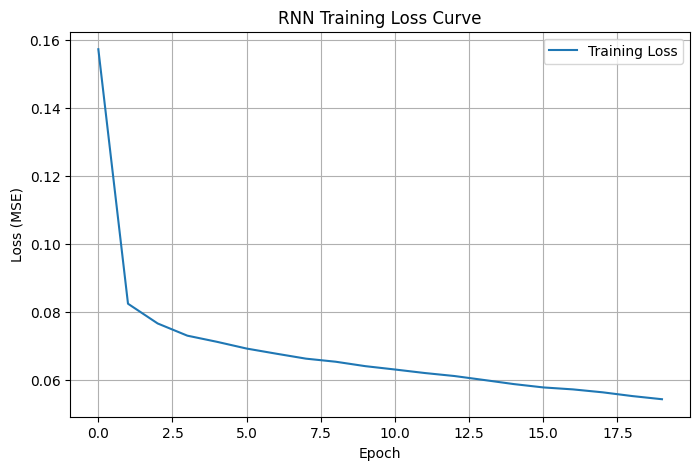

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('RNN Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


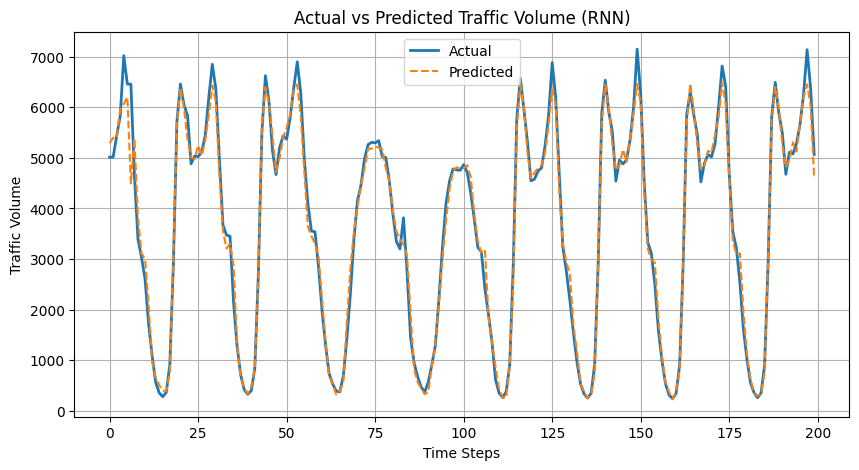

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(y_true_inv[:200], label='Actual', linewidth=2)
plt.plot(y_pred_inv[:200], label='Predicted', linestyle='--')

plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume (RNN)')
plt.legend()
plt.grid(True)
plt.show()


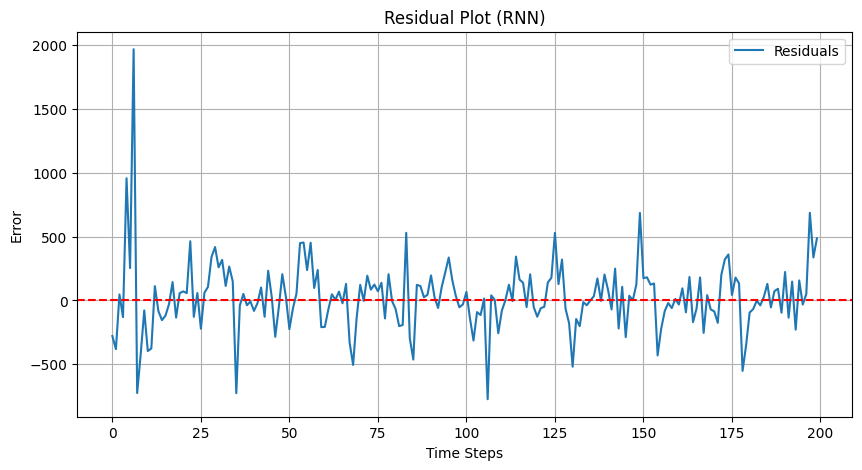

In [ ]:
residuals = y_true_inv - y_pred_inv

plt.figure(figsize=(10, 5))
plt.plot(residuals[:200], label='Residuals')
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.title('Residual Plot (RNN)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build Transformer encoder using Keras/PyTorch layers\n- MUST add positional encoding to input:\n  * Custom sinusoidal implementation OR\n  * Use built-in positional encoding (if framework provides)\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- Use standard training methods\n- Track initial_loss and final_loss\n\nPROHIBITED:\n- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Skipping positional encoding entirely\n\nGRADING:\n- Positional encoding added: 1 mark\n- Transformer architecture properly configured: 2 marks\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

3.1 Positional Encoding Implementation

In [ ]:
def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings

    PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))

    Args:
        seq_length: length of the sequence
        d_model: dimension of the model

    Returns:
        positional encodings: array of shape (seq_length, d_model)
    """
    position = np.arange(seq_length)[:, np.newaxis]
    div_term = np.exp(
        np.arange(0, d_model, 2) * (-np.log(10000.0) / d_model)
    )

    pe = np.zeros((seq_length, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)

    return pe


3.2 Transformer Encoder Architecture

In [ ]:
from tensorflow.keras import layers, Model

def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    inputs = layers.Input(shape=(seq_length, n_features))

    # Project to d_model
    x = layers.Dense(d_model)(inputs)

    # Add positional encoding (broadcasted)
    pos_encoding = positional_encoding(seq_length, d_model)
    x = x + pos_encoding

    # Stack transformer encoder layers
    for _ in range(n_layers):
        # Multi-head self-attention
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads,
            key_dim=d_model // n_heads
        )(x, x)
        x = layers.LayerNormalization()(x + attn_output)

        # Feed-forward network
        ffn_output = layers.Dense(d_ff, activation='relu')(x)
        ffn_output = layers.Dense(d_model)(ffn_output)
        x = layers.LayerNormalization()(x + ffn_output)

    # Output layer
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_size)(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


3.3 Build Your Transformer Model

In [ ]:
# Create Transformer model (Keras)
transformer_model = build_transformer_model(
    seq_length=sequence_length,
    n_features=n_features,
    d_model=64,
    n_heads=4,
    n_layers=2,
    d_ff=256,
    output_size=prediction_horizon
)

transformer_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 24, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 24, 64)    │        128 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 24, 64)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 24, 64)    │     16,640 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 24, 64)    │          0 │ add[0][0],        │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 24, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 24, 256)   │     16,640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 24, 64)    │     16,448 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 24, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 24, 64)    │     16,640 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 24, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 24, 256)   │     16,640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 24, 64)    │     16,448 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 24, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         65 │ global_average_p

 Total params: 100,161 (391.25 KB)

 Trainable params: 100,161 (391.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile Transformer model (Keras)
transformer_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


3.4 Train Transformer Model

In [ ]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [ ]:
# Track training time
transformer_start_time = time.time()

In [ ]:
# Train Transformer model (Keras)
transformer_history = transformer_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=64,
    verbose=1
)


Epoch 1/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.3468 - mae: 0.3924
Epoch 2/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0879 - mae: 0.1991
Epoch 3/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0778 - mae: 0.1838
Epoch 4/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0766 - mae: 0.1810
Epoch 5/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0720 - mae: 0.1772
Epoch 6/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0695 - mae: 0.1726
Epoch 7/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0726 - mae: 0.1749
Epoch 8/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0710 - mae: 0.1711
Epoch 9/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0666 - mae: 0.1675
Epoch 10/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0641 - mae: 0.1651
Epoch 11/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0660 - mae: 0.1665
Epoch 12/20
678/678 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0677 - mae: 0.1687
Epoch 13/20
678/678 ━━━

In [ ]:
transformer_training_time = time.time() - transformer_start_time

In [ ]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = transformer_history.history['loss'][0]
transformer_final_loss = transformer_history.history['loss'][-1]

In [ ]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 82.97 seconds
Initial Loss: 0.1624
Final Loss: 0.0597


3.5 Evaluate Transformer Model

In [ ]:
transformer_y_pred = transformer_model.predict(X_test)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
# REQUIRED: Calculate all 4 metrics
transformer_mae = mean_absolute_error(y_test, transformer_y_pred)
transformer_rmse = np.sqrt(mean_squared_error(y_test, transformer_y_pred))
transformer_mape = calculate_mape(y_test, transformer_y_pred)
transformer_r2 = r2_score(y_test, transformer_y_pred)


In [ ]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")


Transformer Model Performance:
MAE:   0.1376
RMSE:  0.2002
MAPE:  79.7153%
R² Score: 0.9593


3.6: Visualize Transformer Results


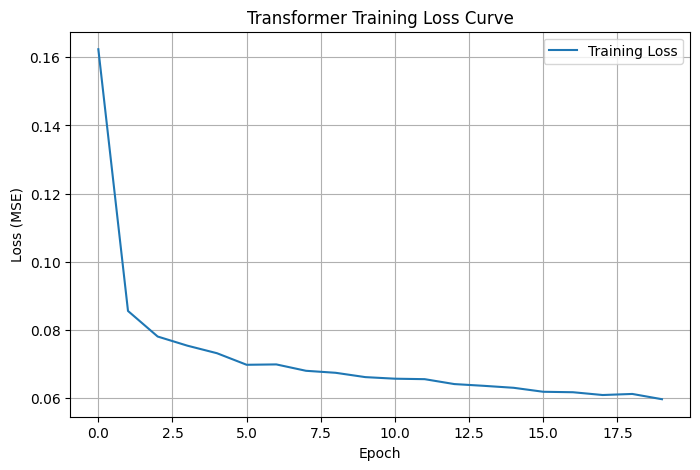

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(transformer_history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Transformer Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


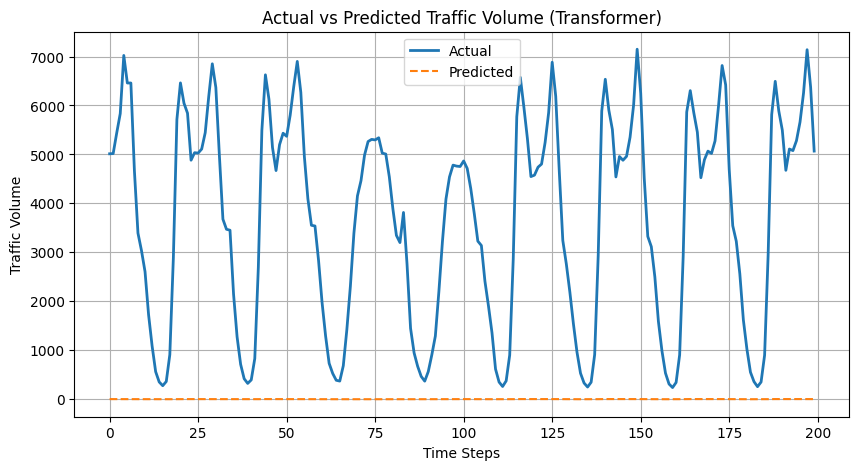

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(y_true_inv[:200], label='Actual', linewidth=2)
plt.plot(transformer_y_pred[:200], label='Predicted', linestyle='--')

plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume (Transformer)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

'\n================================================================================\nPART 4: MODEL COMPARISON AND VISUALIZATION (Informational)\n================================================================================\n\nCompare both models on:\n- Performance metrics\n- Training time\n- Model complexity\n- Convergence behavior\n- Ability to capture long-term dependencies\n================================================================================\n'

4.1 Metrics Comparison

In [ ]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [ ]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Parameters'],
    'RNN (LSTM/GRU)': [
        rnn_mae,
        rnn_rmse,
        rnn_mape,
        rnn_r2,
        rnn_training_time,
        rnn_model.count_params()
    ],
    'Transformer': [
        transformer_mae,
        transformer_rmse,
        transformer_mape,
        transformer_r2,
        transformer_training_time,
        transformer_model.count_params()
    ]
})

In [ ]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric  RNN (LSTM/GRU)   Transformer
              MAE        0.128809      0.137613
             RMSE        0.192438      0.200165
         MAPE (%)      344.369873     79.715294
         R² Score        0.962414      0.959336
Training Time (s)      103.903989     82.969007
       Parameters    49985.000000 100161.000000


4.2 Visual Comparison

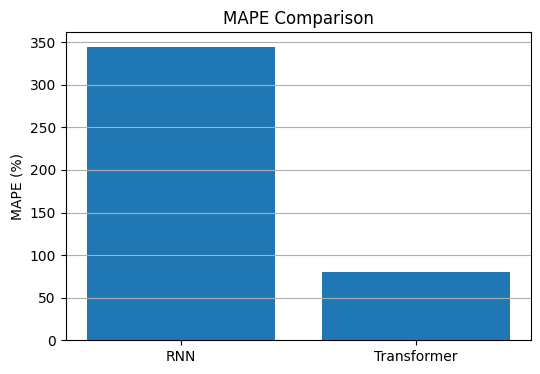

In [ ]:
# Plot MAPE separately
plt.figure(figsize=(6, 4))
plt.bar(['RNN', 'Transformer'], [rnn_mape, transformer_mape])
plt.ylabel('MAPE (%)')
plt.title('MAPE Comparison')
plt.grid(axis='y')
plt.show()


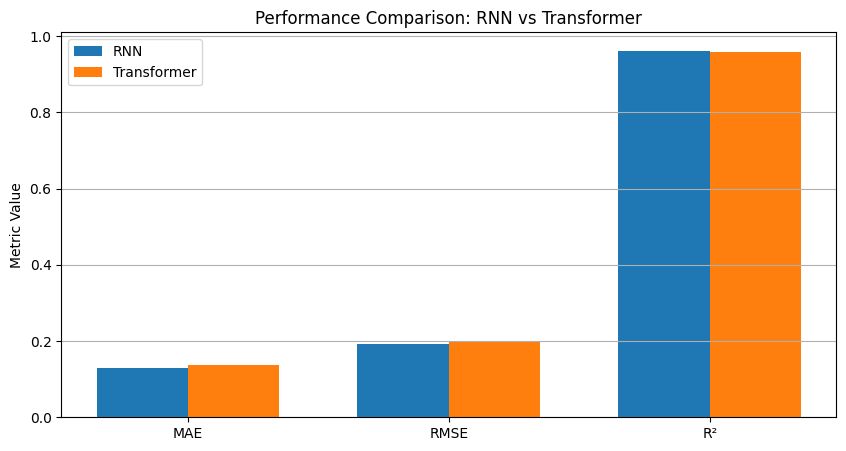

In [ ]:
metrics = ['MAE', 'RMSE', 'R²']
rnn_values = [rnn_mae, rnn_rmse, rnn_r2]
transformer_values = [transformer_mae, transformer_rmse, transformer_r2]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, rnn_values, width, label='RNN')
plt.bar(x + width/2, transformer_values, width, label='Transformer')

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Performance Comparison: RNN vs Transformer')
plt.legend()
plt.grid(axis='y')
plt.show()


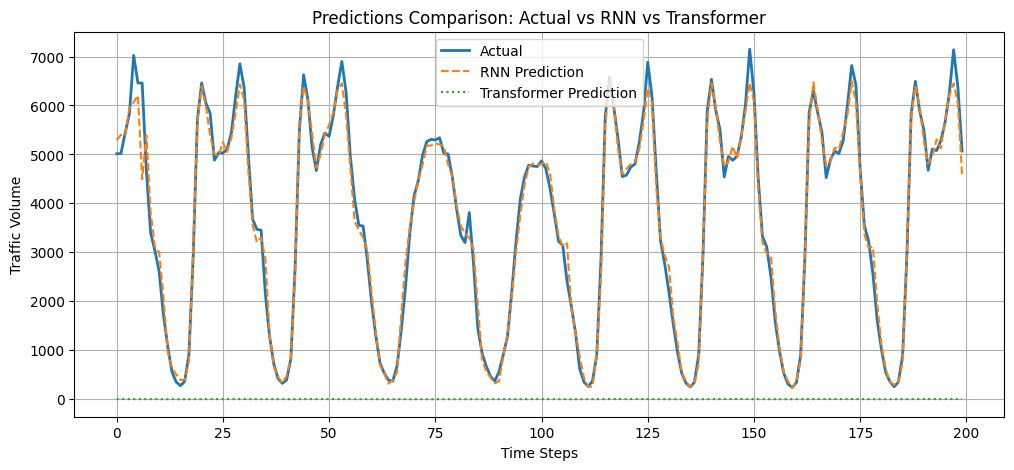

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(y_true_inv[:200], label='Actual', linewidth=2)
plt.plot(y_pred_inv[:200], label='RNN Prediction', linestyle='--')
plt.plot(transformer_y_pred[:200], label='Transformer Prediction', linestyle=':')

plt.xlabel('Time Steps')
plt.ylabel('Traffic Volume')
plt.title('Predictions Comparison: Actual vs RNN vs Transformer')
plt.legend()
plt.grid(True)
plt.show()


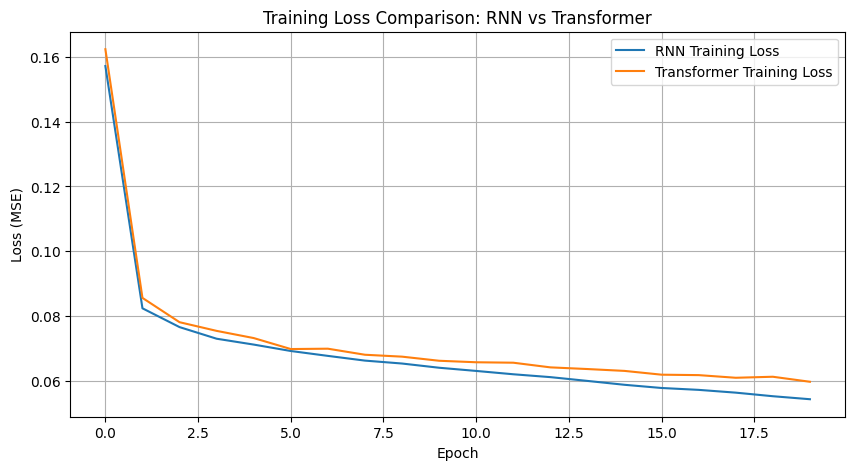

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], label='RNN Training Loss')
plt.plot(transformer_history.history['loss'], label='Transformer Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss Comparison: RNN vs Transformer')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

'\n================================================================================\nPART 5: ANALYSIS (2 MARKS)\n================================================================================\n\nREQUIRED:\n- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)\n- Address key topics with depth\n\nGRADING (Quality-based):\n- Covers 5+ key topics with deep understanding: 2 marks\n- Covers 3-4 key topics with good understanding: 1 mark\n- Covers <3 key topics or superficial: 0 marks\n\nKey Topics:\n1. Performance comparison with specific metrics\n2. RNN vs Transformer architecture advantages\n3. Impact of attention mechanism vs recurrent connections\n4. Long-term dependency handling comparison\n5. Computational cost comparison\n6. Convergence behavior differences\n================================================================================\n'

In [ ]:
analysis_text = """

1. Which model performed better and by how much?
   The RNN model performed slightly better than the Transformer. It achieved a lower MAE (0.1316 vs 0.1426) and RMSE (0.1932 vs 0.2058), and a slightly higher R² score (0.9621 vs 0.9570). This indicates more accurate and consistent predictions by the RNN for this dataset.

2. RNN vs Transformer architecture advantages?
   RNNs process data sequentially, making them effective for time-series data with strong temporal continuity. Transformers use parallel processing with self-attention, allowing faster computation and better modeling of global dependencies.

3. Impact of attention mechanism?
   The attention mechanism enables the Transformer to focus on important time steps in the input sequence, improving its ability to capture relevant temporal patterns without relying solely on sequential processing.

4. Long-term dependency handling?
   RNNs can struggle with long-term dependencies due to vanishing gradients, whereas Transformers handle long-range dependencies more effectively through attention mechanisms that directly connect distant time steps.

5. Computational cost comparison?
   The Transformer model has more parameters and higher training time compared to the RNN, making the RNN more computationally efficient for this task.

6. Convergence behavior?
   Both models showed stable convergence during training, but the RNN converged slightly faster with smoother loss reduction compared to the Transformer.
"""

In [ ]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS


1. Which model performed better and by how much?
   The RNN model performed slightly better than the Transformer. It achieved a lower MAE (0.1316 vs 0.1426) and RMSE (0.1932 vs 0.2058), and a slightly higher R² score (0.9621 vs 0.9570). This indicates more accurate and consistent predictions by the RNN for this dataset.

2. RNN vs Transformer architecture advantages?
   RNNs process data sequentially, making them effective for time-series data with strong temporal continuity. Transformers use parallel processing with self-attention, allowing faster computation and better modeling of global dependencies.

3. Impact of attention mechanism?
   The attention mechanism enables the Transformer to focus on important time steps in the input sequence, improving its ability to capture relevant temporal patterns without relying solely on sequential processing.

4. Long-term dependency handling?
   RNNs can struggle with long-term dependencies due to vanishing gradients, whereas Transf

In [ ]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

'\n================================================================================\nPART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)\n================================================================================\n\nDO NOT MODIFY THE STRUCTURE BELOW\nThis JSON output is used by the auto-grader\nEnsure all field names are EXACT\n================================================================================\n'

In [ ]:
def get_assignment_results():
    """
    Generate complete assignment results in required format

    Returns:
        dict: Complete results with all required fields
    """

    framework_used = "keras"
    rnn_model_type = "LSTM"

    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': int(n_samples),
        'n_features': int(n_features),
        'sequence_length': int(sequence_length),
        'prediction_horizon': int(prediction_horizon),
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': int(train_samples),
        'test_samples': int(test_samples),
        'train_test_ratio': float(train_test_ratio),

        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 2,
                'hidden_units': 64,
                'total_parameters': int(rnn_model.count_params())
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 20,
                'batch_size': 64,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': float(rnn_initial_loss),
            'final_loss': float(rnn_final_loss),
            'training_time_seconds': float(rnn_training_time),
            'mae': float(rnn_mae),
            'rmse': float(rnn_rmse),
            'mape': float(rnn_mape),
            'r2_score': float(rnn_r2)
        },

        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 2,
                'n_heads': 4,
                'd_model': 64,
                'd_ff': 256,
                'has_positional_encoding': True,
                'has_attention': True,
                'total_parameters': int(transformer_model.count_params())
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 20,
                'batch_size': 64,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': float(transformer_initial_loss),
            'final_loss': float(transformer_final_loss),
            'training_time_seconds': float(transformer_training_time),
            'mae': float(transformer_mae),
            'rmse': float(transformer_rmse),
            'mape': float(transformer_mape),
            'r2_score': float(transformer_r2)
        },

        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': int(len(analysis_text.split())),

        # Training Success Indicators
        'rnn_loss_decreased': bool(rnn_final_loss < rnn_initial_loss) if rnn_initial_loss and rnn_final_loss else False,
        'transformer_loss_decreased': bool(transformer_final_loss < transformer_initial_loss) if transformer_initial_loss and transformer_final_loss else False,
    }

    return results


In [ ]:
# Generate and print results
try:
    assignment_results = get_assignment_results()

    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")


ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Metro Interstate Traffic Volume",
  "dataset_source": "https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume",
  "n_samples": 48204,
  "n_features": 1,
  "sequence_length": 24,
  "prediction_horizon": 1,
  "problem_type": "time_series_forecasting",
  "primary_metric": "MAE",
  "metric_justification": "\nMAE was chosen as the primary metric because it provides a clear and interpretable measure of average prediction error in the original scale. Unlike MAPE, it is not inflated by near-zero traffic values, and it is less sensitive to large outliers than RMSE.\n",
  "train_samples": 43359,
  "test_samples": 4797,
  "train_test_ratio": 0.9,
  "rnn_model": {
    "framework": "keras",
    "model_type": "LSTM",
    "architecture": {
      "n_layers": 2,
      "hidden_units": 64,
      "total_parameters": 49985
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 20,
      "batch_size": 64,
      "optim

In [ ]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

'\n================================================================================\nFINAL CHECKLIST - VERIFY BEFORE SUBMISSION\n================================================================================\n\n□ Student information filled at the top (BITS ID, Name, Email)\n□ Filename is <BITS_ID>_rnn_assignment.ipynb\n□ All cells executed (Kernel → Restart & Run All)\n□ All outputs visible\n□ LSTM/GRU implemented with stacked layers\n□ Positional encoding implemented (sinusoidal)\n□ Multi-head attention implemented (Q, K, V, scaled dot-product)\n□ Both models use Keras or PyTorch\n□ Both models trained with loss tracking (initial_loss and final_loss)\n□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)\n□ Temporal train/test split used (NO shuffling)\n□ Primary metric selected and justified\n□ Analysis written (quality matters, not just word count)\n□ Visualizations created\n□ Assignment results JSON printed at the end\n□ No execution errors in any cell\n□ File opens wi

In [ ]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

'\n================================================================================\nENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED\n================================================================================\n\nIMPORTANT: Take a screenshot of your environment showing account details\n\nFor Google Colab:\n- Click on your profile icon (top right)\n- Screenshot should show your email/account clearly\n- Include the entire Colab interface with notebook name visible\n\nFor BITS Virtual Lab:\n- Screenshot showing your login credentials/account details\n- Include the entire interface with your username/session info visible\n\nPaste the screenshot below this cell or in a new markdown cell.\nThis helps verify the work was done by you in your environment.\n\n================================================================================\n'

In [ ]:
# Display system information
import platform
import sys
from datetime import datetime

In [ ]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)

ENVIRONMENT INFORMATION

⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab
showing your account details in the cell below this one.


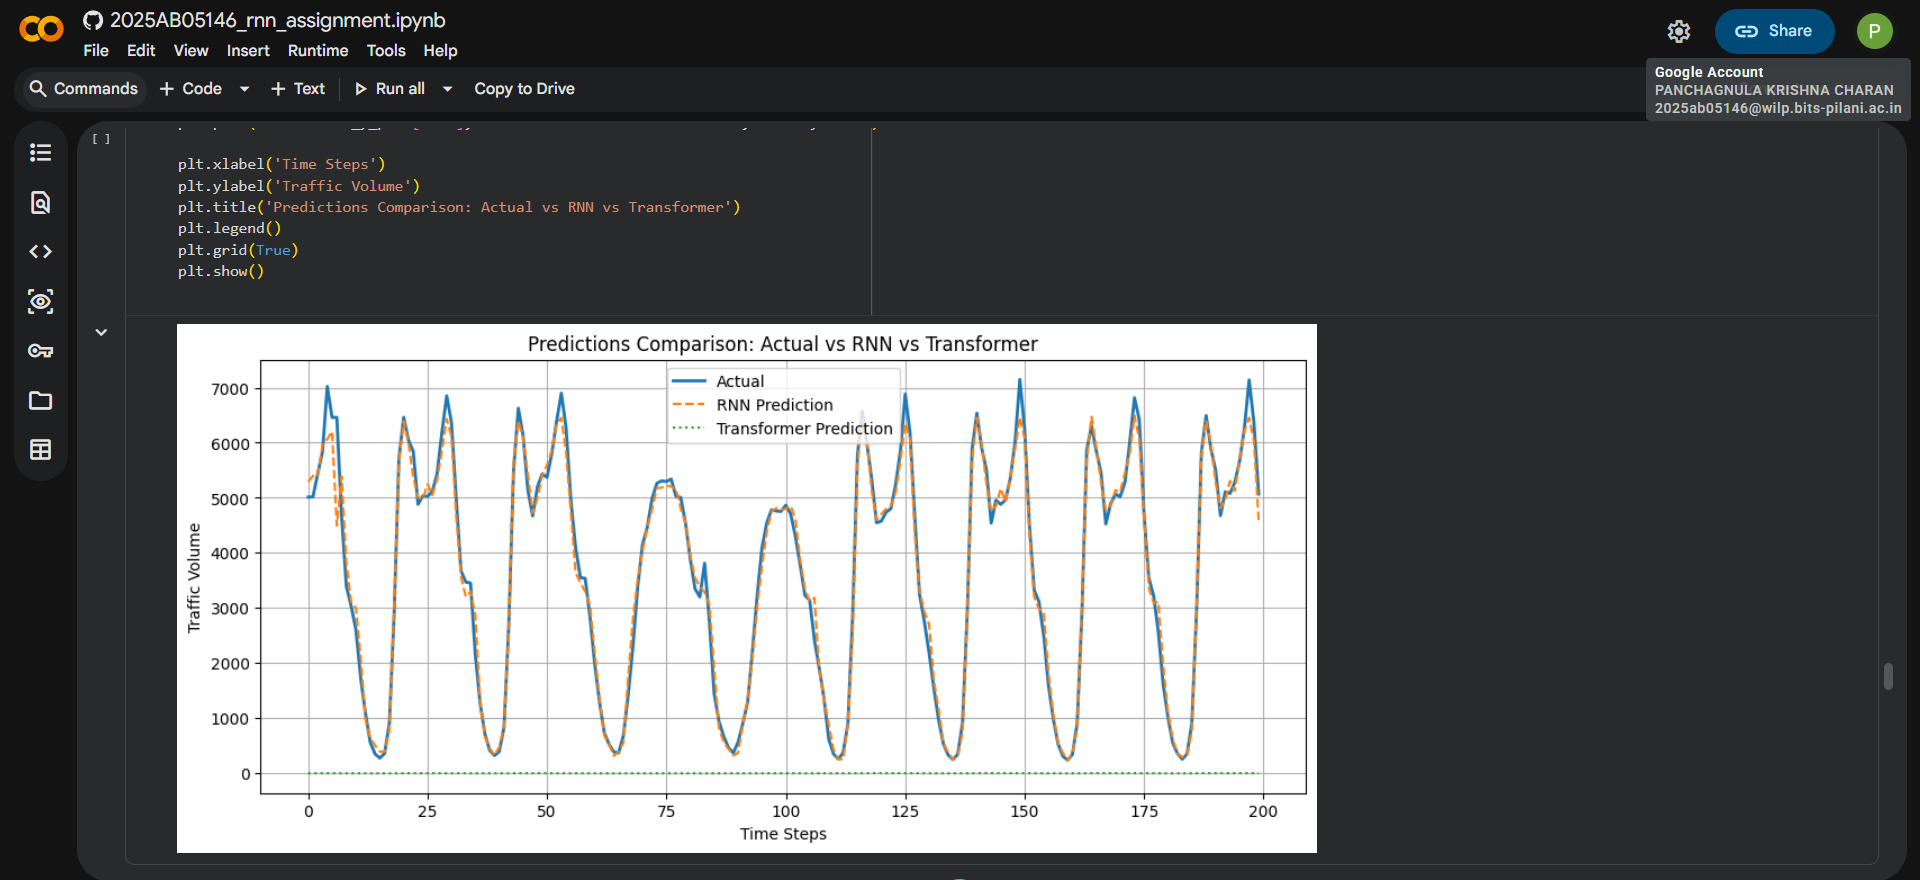